In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp
from astropy import coordinates
from astropy import units as u
from scipy.ndimage.filters import gaussian_filter

In [3]:
d2r = np.pi / 180.

In [4]:
bank = 'A'
session = '5'
dataf = np.load('/home/mabitbol/GBT-S140/datamaps/tod'+bank+'_'+session+'.npz')
tmask = dataf['tmask']
ras = dataf['ras'][tmask]
decs = dataf['decs'][tmask]
calibrated = dataf['calibrated'][tmask]

tmask2 = ~np.isnan(calibrated)
ras = ras[tmask2]
decs = decs[tmask2]
calibrated = calibrated[tmask2] 

In [5]:
c = coordinates.SkyCoord(frame='icrs', ra=ras*u.degree, dec=decs*u.degree)
lats = c.galactic.b.deg
lons = c.galactic.l.deg

In [6]:
#x (row, column).  row goes from down to up.  column goes from left to right. 

In [7]:
lonc = 107.2
latc = 5.2
lonra = [lons.min(), lons.max()]
latra = [lats.min(), lats.max()]

In [8]:
import glob 

In [9]:
fmaps = glob.glob('/home/mabitbol/GBT-S140/externaldata/*.fits')
fmaps.sort()

In [10]:
fmaps

['/home/mabitbol/GBT-S140/externaldata/COM_CompMap_AME-commander_0256_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/COM_CompMap_Dust-GNILC-Model-Opacity_2048_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/COM_CompMap_Synchrotron-commander_0256_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/COM_CompMap_SynchrotronPol-commander_0256_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/COM_CompMap_freefree-commander_0256_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_Mask_PointSrc_2048_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_100-field-IQU_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_143-field-IQU_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_217-field-IQU_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_353-field-IQU_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_545-field-Int_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/H

In [11]:
def regrid(fmap, sname):
    dmap = hp.read_map(fmap)
    x = hp.cartview(dmap, lonra=lonra, latra=latra, return_projected_map=True, flip='geo')
    fig = gcf()
    ax = fig.axes[0]
    img = ax.images[0]
    X = np.linspace(img.get_extent()[0], img.get_extent()[1], 800)
    Y = np.linspace(img.get_extent()[2], img.get_extent()[3], 815)
    z = {'lons': X, 'lats': Y, 'signal': x.data}
    np.savez('../externaldata/'+sname+'_gridded.npz', **z)
    return 

In [30]:
k = 34
print fmaps[k].split('/')[-1]

wcs.fits


NSIDE = 2048
ORDERING = RING in fits file


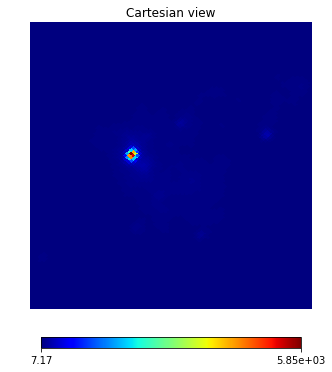

In [29]:
regrid(fmaps[k], 'IRIS3')

In [98]:
# left do to is the high resolution 408 MHz map and high res halpha map

In [162]:
x = imread('../externaldata/cgps.jpg')

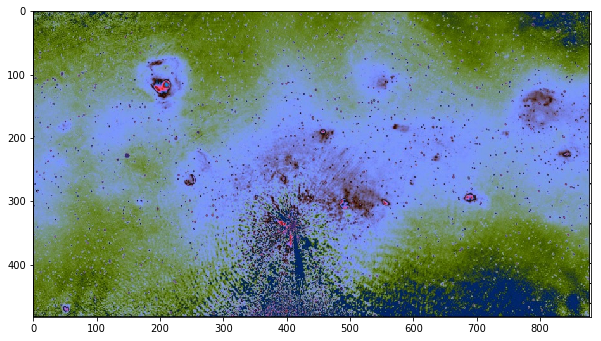

In [163]:
imshow(x)

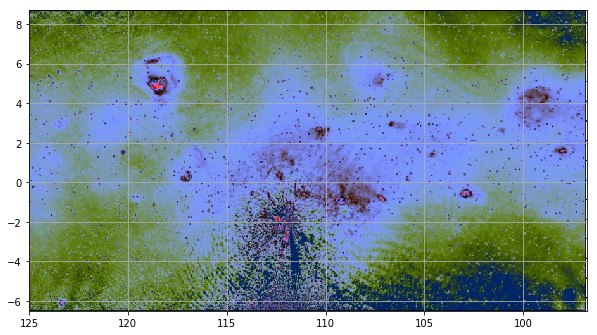

In [164]:
figsize(10, 8)
imshow(x, extent=(lon[0], lon[-1], lat[-1], lat[0]))
grid()

In [167]:
lon0 = 105.75373014758679
lon1 = 108.63985470200107

In [168]:
lat0 = 3.7308093328743528
lat1 = 6.6709293227336524

In [259]:
df=0.027

In [260]:
lon0 = 105.75373014758679-df
lon1 = 108.63985470200107+df

In [261]:
lat0 = 3.7308093328743528-df
lat1 = 6.6709293227336524+df

In [312]:
lat = (15.12 / 483. * np.arange(483) - 6.5)[::-1]

In [313]:
lon = (97 - 125.32) / 881. * np.arange(881) + 125

In [314]:
maskx = (lat >= lat0 ) * (lat <= lat1)
masky = (lon >= lon0) * (lon <= lon1)

In [315]:
dlons = lon[masky]
dlats = lat[maskx]

In [316]:
dsig = x[maskx, :, :][:, masky, :]

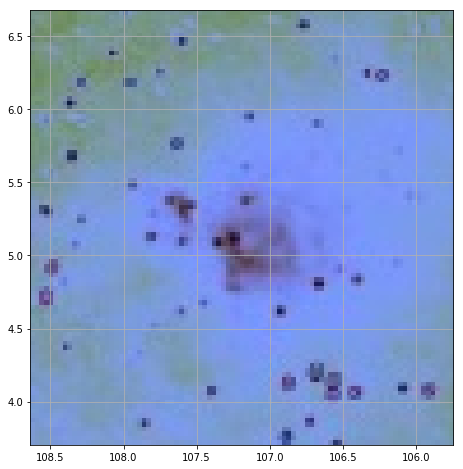

In [317]:
figsize(10, 8)
imshow(dsig[:, ::-1, :], extent=(dlons[0], dlons[-1], dlats[-1], dlats[0]))
grid()

In [318]:
z = {'lons':dlons, 'lats':dlats, 'signal':dsig}

In [319]:
np.savez('../externaldata/cgps', **z)

In [32]:
from astropy.io import fits

In [33]:
test = fits.open('../externaldata/J2000')

IOError: Header missing END card.

In [56]:
hdu = test[0]

In [61]:
hdu.header

SIMPLE  =                    T /                                                
BITPIX  =                  -32                                                  
NAXIS   =                    4 /                                                
NAXIS1  =                 1024 /                                                
NAXIS2  =                 1034 /                                                
NAXIS3  =                    1 /                                                
NAXIS4  =                    1 /                                                
EXTEND  =                    T /Tables following main image                     
BLOCKED =                    T /Tape may be blocked                             
OBJECT  = 'C2230P60'                                                            
TELESCOP= 'VLA     '                                                            
INSTRUME= 'L-BAND  '                                                            
OBSERVER= 'NVSS GRP'        

In [62]:
test[0].data.shape

(1, 1, 1034, 1024)

In [63]:
test[1].data.shape

(820,)

In [64]:
xmap = test[0].data[0][0]

In [66]:
xmap.shape

(1034, 1024)

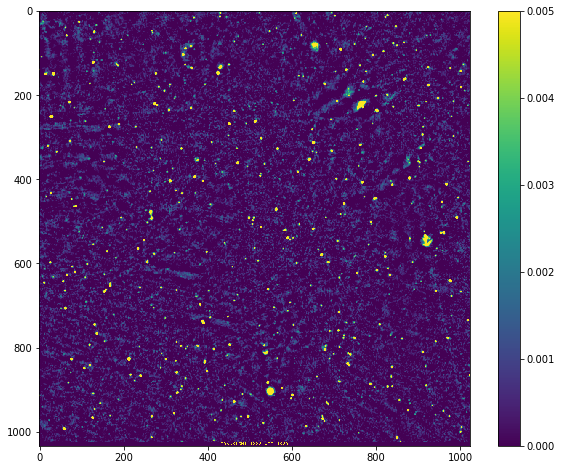

In [73]:
figsize(10, 8)
imshow(xmap)
clim(0, 0.005)
colorbar()

In [60]:
test[1].data[0]

(333.29302564360324, 61.912878664311599, 0.0022296307, 0.017624956, 0.014813488, -79.998817, -7.9098689e-05, 0.00056193513, 0.0011362552, 0.00051360973, 0.00033805583, 0.00043611546, 0.0012830406, -0.0010842552, 986.9411, 987.11273, 'C2230P60', 2450905)

In [49]:
xmap = fits.open('../externaldata/new-image.fits')
hdu = xmap[0]
cra = hdu.header['CRVAL1']
mra = hdu.header['CRPIX1']
cdec = hdu.header['CRVAL2']
mdec = hdu.header['CRPIX2']
spix = hdu.header['CD1_1']
ras = (np.arange(1663) - mra) * spix + cra
decs = (np.arange(1252) - mdec) * spix + cdec

In [50]:
hdu.header

SIMPLE  =                    T / Fits format                                    
BITPIX  =                    8 / bits per pixel                                 
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 1663 / image width                                    
NAXIS2  =                 1252 / image height                                   
COMMENT Original key: "END"                                                     
COMMENT                                                                         
COMMENT --Start of Astrometry.net WCS solution--                                
COMMENT --Put in by the new-wcs program--                                       
COMMENT                                                                         
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / T

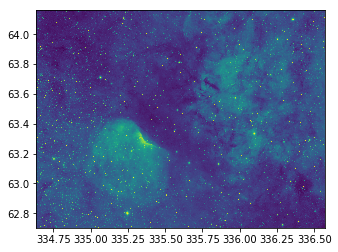

In [33]:
imshow(hdu.data, origin='lower', extent=(ras[0], ras[-1], decs[0], decs[-1]))